# <div dir=rtl> תרגול שמיני - Decision Trees, Sampling, Missing values </div>
<div dir=rtl>
    בתרגול זה נכיר כלי נוסף בעולם הלמידה המפוקחת ונכיר דרכים להתמודדות עם ערכים חסרים ודאטא לא מאוזנת.
</div>



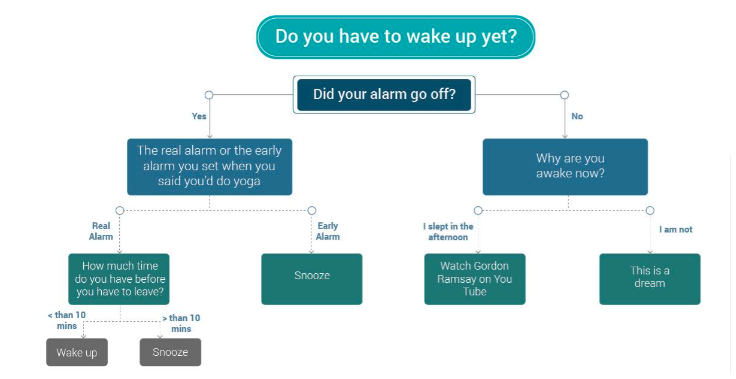

## <div dir=rtl>שאלה 1</div>


<div dir=rtl>
    בשנת 2008 פרסם הNIH האמריקאי מידע על אודות 4238 תושבי העיר פארמינגהם במדינת מסצ'וסטס. <br />
    המידע כלל נתונים על בריאותם של המשתתפים במחקר והאם בתוך עשור המשתתפים זוהו כסובלים ממחלות בכלי הדם הכליליים בלב. המידע זמין בקובץ 6_heart_disease_3.csv. <br />
</div>
<div dir=rtl style='background-color: #fcf2f2;'> 
    הערה: הדאטאסט אמיתי וניתן להורדה בצורה חופשית. הנתונים בו שונו לצורך הדוגמה. <br />
</div><br />
<div dir=rtl>
    א. טענו את הקובץ לאובייקט מסוג DataFrame.
</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.grid':True,
         'axes.grid.which':'both'
         }
plt.rcParams.update(params)

In [3]:
%ls

6_heart_disease_3.csv* 8_recitation_8.html*   8_recitation_8.ipynb*


In [4]:
df = pd.read_csv('6_heart_disease_3.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,NaN,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0.0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0.0,61,3.0,1,30.0,0.0,0,1,0,225.0,190.0,95.0,28.58,65.0,103.0,1
4,0.0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4197 non-null   float64
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 529.9 KB


<div dir=rtl>
    עוד כשהכרנו את הדאטא הזה הבחנו בקיומם של ערכים חסרים - כמו שרואים בטבלה למעלה. דבר נוסף שהבחנו בו הוא העובדה שהמחלקות בדאטא לא מאוזנות:
</div>

In [6]:
pd.DataFrame(df['TenYearCHD'].value_counts())

,TenYearCHD
0,3594
1,644


<div dir=rtl>
    ב. פתרו את בעית האיזון בשיטה לבחירתכם.
</div>
<br /><br />

<div dir=rtl>
    על מנת להתמודד עם חוסר האיזון ניתן לבחור במספר דרכים: אנחנו יכולים ראשית כל לבחור מודל מתאים לדאטא לא מאוזנת (ונראה את זה בהמשך), באלגוריתמים מסוימים אנחנו יכולים למשקל את ה"עונש" על טעות במחלקה הפחות מיוצגת כך שהעונש יהיה גדול ולבסוף אנחנו יכולים לעשות דגימת יתר <b>(over-sampling)</b> או דגימת חסר <b>(under-sampling)</b>. <br /><br />
</div>
<div dir=rtl>
    בדגימת יתר נשכפל את הדגימות במחלקה הקטנה יותר (ניתן לשכפל גם עם רעש - אבל צריך להיזהר ברעש) כך שהמחלקה תהיה מיוצגת יותר טוב. בדגימת חסר נבחר באקראי דגימות מסוימות מהמחלקה הגדולה ונזרוק את האחרות.
    <br />
    לכל שיטה הייתרונות והחסרונות שלה. הפתרון האולטימטיבי יהיה להגדיל את מספר הדגימות האמיתיות במחלקה הקטנה, אך מכיוון שזה לא תמיד אפשרי - נבחר כרצוננו דרך התמודדות.
</div>

In [7]:
negative_ind = df.loc[df['TenYearCHD']==0,:].index.values
positive_ind = df.loc[df['TenYearCHD']==1,:].index.values

# These two lines are for a solution with under sampling
# to_take = np.random.choice(negative_ind, size=len(positive_ind), replace=None)
# to_take.shape
positive_ind.shape

(644,)

In [8]:
# df_balanced = df.iloc[np.concatenate([to_take,positive_ind]), :]
df_balanced = pd.concat(
    [
        df,
        df.iloc[np.repeat(positive_ind, 4), :]
    ]
)

pd.DataFrame(df_balanced['TenYearCHD'].value_counts())

,TenYearCHD
0,3594
1,3220


<div dir=rtl>
    למעלה בחרנו מתוך הדאטא את השורות החיוביות ארבע פעמים וצירפנו לדאטא המקורית את האינדקסים החיוביים - שכפלנו את הדגימות החולות פי 5. <br />
    לכאורה פתרנו את הבעיה... 
</div>
<br />
<div dir=rtl>
    ג. אמנו מודל מסוג עץ החלטה לקלסיפיקציה. הציגו את העץ ובחנו את ביצועיו על חמש חלוקות זרות של הדאטא המאוזנת. 
</div>
<br />
<div dir=rtl>
     עץ החלטה - מודל המכיל אוסף נלמד של משפטי תנאי. בכל שלב המודל שואל שאלה אחת מהסוג "האם הפיצ'ר הx גדול או קטן מהערך y? 
    <br />
    המודל ממזער מדד "לכלוך" (impurity) כלשהו תוך כדי למידה. אנחנו נשתמש באנטרופיה משום שהאלגוריתם יותר אינטואיטיבי להבנה. המודל מנסה למזער את האנטרופיה - לגרום להסתברות של כל מחלקה בכל עלה של העץ להיות 1.
    <br />
     למודל יש ייתרונות וחסרונות. הוא קל להבנה אינטואיטיבית ואינטרפרטציה של מה נלמד; הוא מסוגל ללמוד פיצ'רים רציפים ובדידים ביחד; הוא מתמודד טוב יחסית עם דאטא לא מאוזנת. עם זאת - הוא נוטה לאוברפיט חזק משום שרמת הסיבוך של המודל נקבעת ישירות על ידי המשתמש.
</div>
<br /><br />
<div dir=rtl>
    אנחנו נלמד את המודל על בסיס שלוש פיצ'רים מתוך הדאטא. נשים לב שבחרנו פיצ'רים רציפים יחד עם פיצ'ר בדיד ולמעשה בוליאני.
</div>



In [14]:
from sklearn import tree

features = ['male', 'BMI','age']

df2 = df_balanced[features + ['TenYearCHD']].dropna()

t1 = tree.DecisionTreeClassifier(
    max_depth=4,
    criterion='entropy'
)
tree_fit = t1.fit(
    df2[features].values,
    df2['TenYearCHD']
)


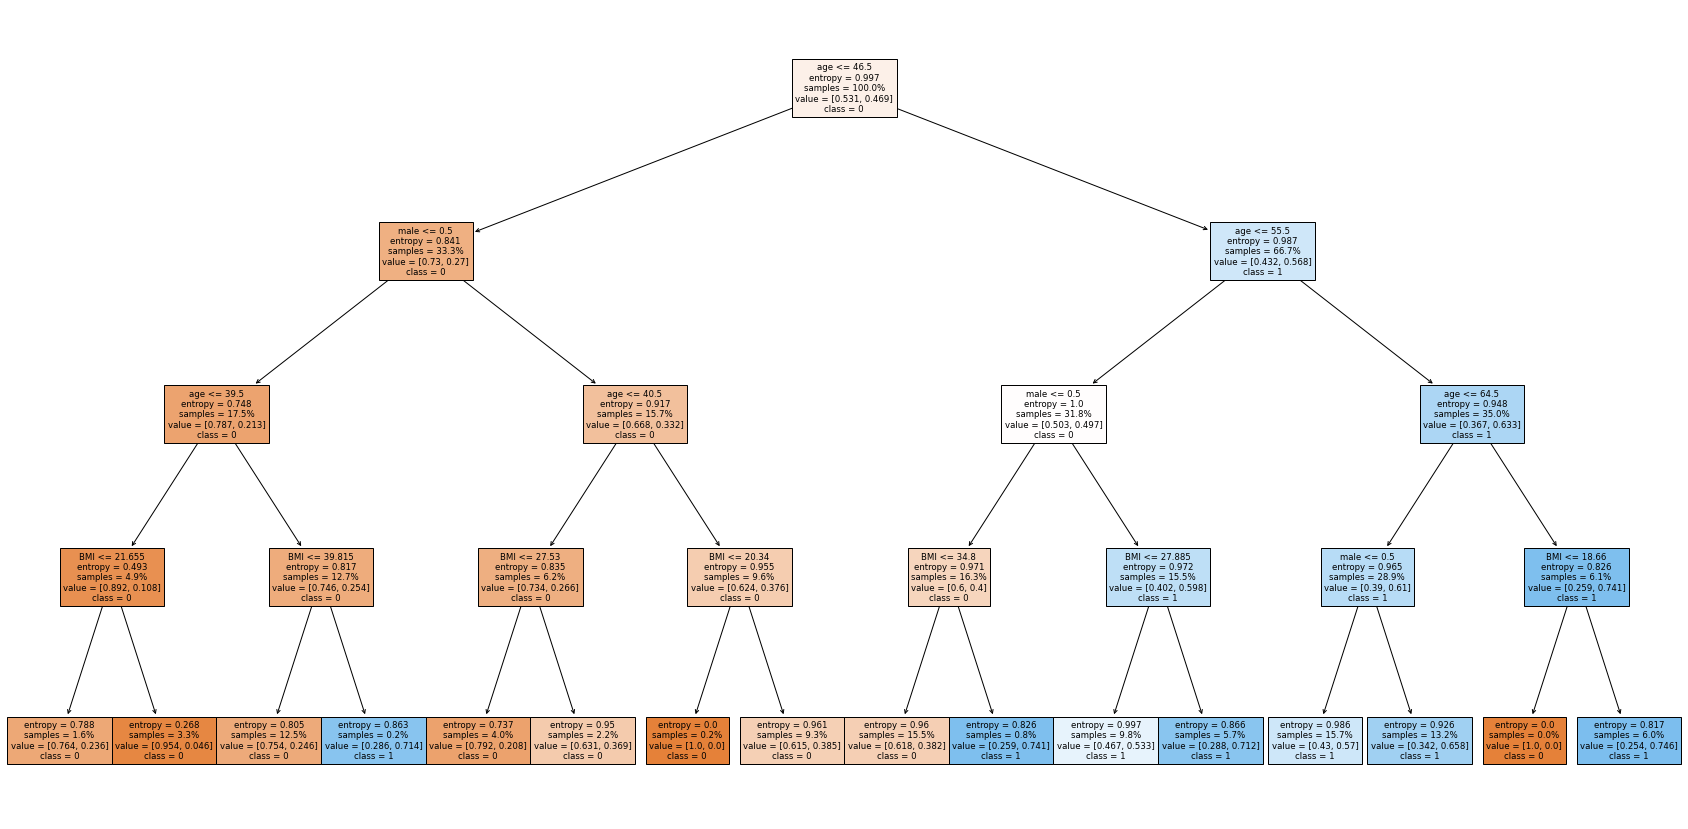

In [15]:
tp = tree.plot_tree(
    tree_fit,
    feature_names=features,
    class_names=['0','1'],
    filled=True,
    impurity=True,
    proportion=True
)

<div dir=rtl>
    העץ שמוצע פה מכיל אינפורמציה לגביי הפיצולים - הצבע של כל צומת הוא לפי הclass שמייצג את רוב התצפיות באותו הפיצול. <br />
    הפרמטר <code>value</code> מתאר את הפרופורציה של כל אחת מהקבוצות באותו הפיצול 
</div>



In [11]:
from sklearn.model_selection import cross_val_score

t1 = tree.DecisionTreeClassifier(
    max_depth=4,
    criterion='entropy'
)

scores = cross_val_score(t1, df2[features].values, df2['TenYearCHD'])
print(scores.mean(), '±', scores.std())

0.6479188956826126 ± 0.019260351704253675


<div dir=rtl>
    נשים לב למעלה ל"עומק" העץ. מה היה קורה אם לא היינו מגבילים אותו ל4? 
</div>

### <div dir=rtl>    ערכים חסרים </div>
<div dir=rtl>
    ד. פתרו את בעיית הערכים החסרים ללא החסרת רשומות.
</div>



In [16]:
df_balanced[features].describe()

,male,BMI,age
count,6745.000000,6755.000000,6814.000000
mean,0.468050,26.075859,51.309216
std,0.499015,4.264706,8.647860
min,0.000000,15.540000,32.000000
25%,0.000000,23.170000,44.000000
50%,0.000000,25.680000,51.000000
75%,1.000000,28.395000,58.000000
max,1.000000,56.800000,70.000000


<div dir=rtl>
    ראשית נשים לב בטבלה למעלה שבשניים מתוך שלושת הפיצ'רים שבחרנו יש ערכים חסרים. 
    <br />
    כעת, בבואנו לטפל בערכים חסרים בדאטא עלינו לשאול את עצמינו שתי שאלות:
</div>


- Does the data exist?
<div dir=rtl>
    האם יש משמעות בכלל לדאטא אם הוא לא היה חסר? 
</div>

- Is the data missing due to non-response?
<div dir=rtl>
    האם הדאטא חסר כי הנבדק לא השיב? 
</div>
<br />

<div dir=rtl>
    אם ורק אם אנחנו במקרה השני ננסה להציב ערכים אחרים במקום הערכים החסרים. חישבו על זה כך - אם בטבלה הייתה עמודה של "מספר הריונות קודמים", האם הייתה משמעות לערכים החסרים עבור קבוצת הגברים בעולם האמיתי? 
</div>

<br />

<div dir=rtl>
    כשאנחנו מטפלים בערכים חסרים עלינו לשאול את עצמינו שאלה נוספת - האם יש התאמה בין הערכים החסרים לבין הלייבל שלנו?  בעולם הסטטיסטיקה מגדירים שלושה מקרים, שלא ניכנס אליהם כעת:
</div>

1. Missing completely at random
1. Missing at random
1. Missing not at random

### Dropping missing samples

<div dir=rtl>
    זריקת הדוגמאות בהן יש ערכים חסרים (לרוב - שורות). זה מה שעשינו עד כה וזו האופציה בה נבחר אם המידע לא קיים. עלינו להיות מודעים למספר הדוגמאות אותן אנחנו זורקים.
</div>

### Imputation 

<div dir=rtl>
    החלפת הערך החסר במספר כלשהו. יש הרבה שיטות לבחירת המספר ולא נוכל לעבור על כולן. אנחנו בתרגול נראה שתיים.
</div>

- Imputation with mean:

<div dir=rtl>
    החלפת ערך חסר בממוצע. שימו לב שכאן מדובר בהחלפת הערך בממוצע הכללי - ללא התחשבות במחלקות. ניתן להתחשב במחלקות כאשר בוחרים ערך אבל הדבר מביא איתו אתגרים (כמו מה עושים בזמן מבחן). <br />
    אם נסתכל על הפונקציה mean של פנדס נראה שהיא עובדת פר-עמודה:
</div>


In [17]:
df_balanced.mean()

male                 0.468050
age                 51.309216
education            1.929722
currentSmoker        0.502788
cigsPerDay           9.619301
BPMeds               0.042876
prevalentStroke      0.010126
prevalentHyp         0.383915
diabetes             0.039478
totChol            239.993757
sysBP              155.513869
diaBP               84.438876
BMI                 26.075859
heartRate           76.124982
glucose             84.654031
TenYearCHD           0.472557
dtype: float64

<div dir=rtl>
    למזלינו פנדס יודע להחליף ערכים חסרים בעמודה כלשהי עם הממוצע של אותה עמודה. נראה דוגמה פשוטה יותר:
</div>


In [18]:
paychecks = pd.DataFrame({'John':[10000,15000,np.nan], 'Jane': [15000,30000,45000]},
                         index=['January','February', 'March'],
                         dtype=float)
paychecks

,John,Jane
January,10000.0,15000.0
February,15000.0,30000.0
March,NaN,45000.0


<div dir=rtl>
    נחליף את הערך החסר עם הפונקציה fillna:
</div>


In [19]:
paychecks.fillna(paychecks.mean())

,John,Jane
January,10000.0,15000.0
February,15000.0,30000.0
March,12500.0,45000.0


<div dir=rtl>
    ואכן קיבלנו את מה שרצינו - החלפת הערך החסר עם הממוצע של אותה עמודה. ההחלפה הזו פשוטה ונקראת Simple Imputation. 
    <br />
    החלפה יותר מורכבת נקראת Iterative Imputation. החלפה כזו לוקחת בחשבון גם עמודות אחרות (אם נראה בדוגמה הפשוטה למעלה נבין למשל שהמשכורת החודשית עולה מחודש לחודש למשל).
    <br />
    אמנם המימוש של ההחלפות האלו לא מסובך - מימשו זאת עבורינו כבר:
    <a href='https://scikit-learn.org/stable/modules/impute.html'>Scikit-learn Impute</a>
    <br />
    נחזור כעת לדאטא שלנו: נבצע את ההחלפה עם הממוצע ונבדוק מה מספר הערכים הקיימים בדאטא 
</div>

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

s_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

print("==== Simple ====")
display(pd.DataFrame(s_imp.fit_transform(paychecks)))

print("\n==== Iterative ====")
i_imp = IterativeImputer()
display(pd.DataFrame(i_imp.fit_transform(paychecks)))

==== Simple ====


,0,1
0,10000.0,15000.0
1,15000.0,30000.0
2,12500.0,45000.0



==== Iterative ====


,0,1
0,10000.0,15000.0
1,15000.0,30000.0
2,20000.0,45000.0


In [21]:
df_balanced_imputed = df_balanced.fillna(df_balanced.mean())

df_balanced_imputed.describe().T['count']

male               6814.0
age                6814.0
education          6814.0
currentSmoker      6814.0
cigsPerDay         6814.0
BPMeds             6814.0
prevalentStroke    6814.0
prevalentHyp       6814.0
diabetes           6814.0
totChol            6814.0
sysBP              6814.0
diaBP              6814.0
BMI                6814.0
heartRate          6814.0
glucose            6814.0
TenYearCHD         6814.0
Name: count, dtype: float64

<div dir=rtl>
    כעת נאמן שוב וניבחן שוב:
</div>


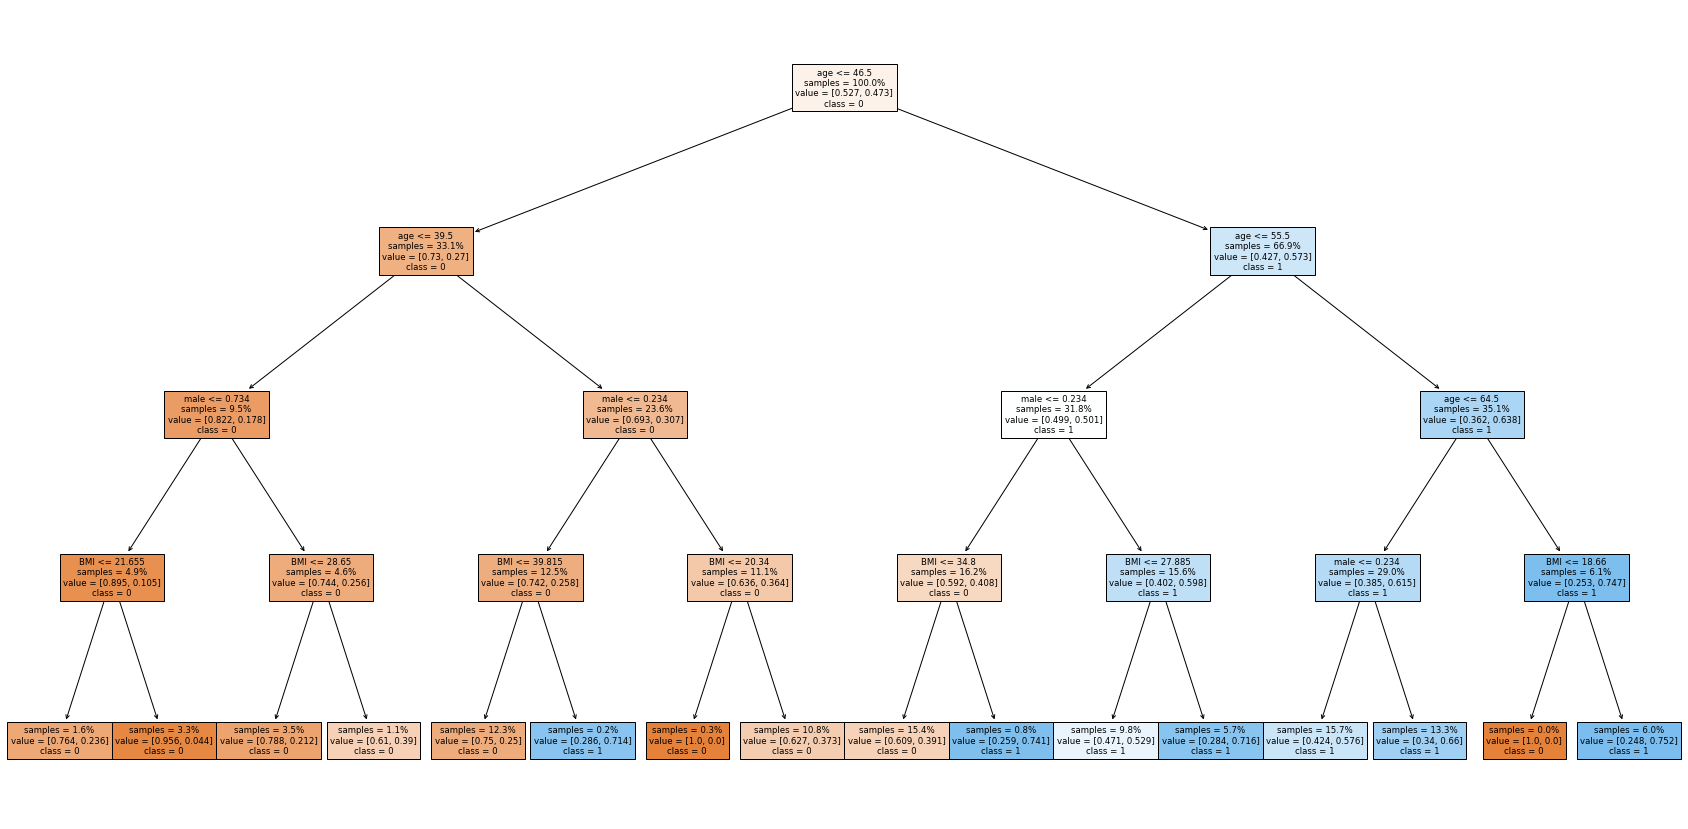

In [22]:
t2 = tree.DecisionTreeClassifier(
    max_depth=4,
    criterion='entropy'
)
tree_fit = t2.fit(
    df_balanced_imputed[features].values,
    df_balanced_imputed['TenYearCHD']
)
tp = tree.plot_tree(
    tree_fit,
    feature_names=features,
    class_names=['0','1'],
    filled=True,
    impurity=False,
    proportion=True
)

In [23]:
scores = cross_val_score(t2, df_balanced_imputed[features].values, df_balanced_imputed['TenYearCHD'])
print(scores.mean(), '±', scores.std())

0.6479321872478326 ± 0.021767925976778228


- Imputation with Nearest Neighbors:

<div dir=rtl>
    במצב זה מחפשים מה הדוגמאות הכי קרובות לדוגמה בה יש ערך חסר ומשלימים באמצעותן את הערך החסר. לפי ברירת מחדל - מספר הדוגמאות אותן נחפש הוא 5. נשים לב להוריד את הלייבל כשמחפשים דוגמאות קרובות! למה?
</div>

In [24]:
from sklearn.impute import KNNImputer

knn = KNNImputer()
transformed = knn.fit_transform(df_balanced.drop('TenYearCHD', axis='columns'))
transformed.shape

(6814, 15)

In [25]:
df_balanced_imputed.iloc[:, :-1] = transformed
df_balanced_imputed.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000,6814.000000
mean,0.467860,51.309216,1.931817,0.502788,9.622953,0.043880,0.010126,0.383915,0.039478,240.005606,155.513869,84.438876,26.072156,76.121074,84.453390,0.472557
std,0.498214,8.647860,1.027218,0.500029,12.344934,0.204557,0.100126,0.486373,0.194742,45.994461,35.561458,12.900964,4.253026,12.096924,30.836508,0.499283
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,44.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.000000,125.625000,76.000000,23.192500,68.000000,72.000000,0.000000
50%,0.000000,51.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,237.000000,153.000000,83.000000,25.690000,75.000000,78.000000,0.000000
75%,1.000000,58.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,267.000000,179.000000,92.000000,28.350000,83.000000,87.000000,1.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,335.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<div dir=rtl>
    למעלה - יצרנו אובייקט מתאים, העברנו לו את הדאטא שלנו וביקשנו ממנו להמיר את הערכים כך שלא יהיו ערכים חסרים. נשים לב שהאובייקט קיבל מטריצה - בלי אינדקס ובלי שמות עמודות. אחר כך לקחנו את כל השורות בדאטא-פריים שלנו ואת כל העמודות חוץ מהאחרונה (הלייבל) והצבנו את המטריצה שהתקבלה בחזרה. אנחנו יכולים לעשות זאת משום שאין שאפל של השורות. נשים לב שכעת קיבלנו מספר דומה של ערכים קיימים בכל העמודות.
    <br />
    נאמן שוב...
</div>

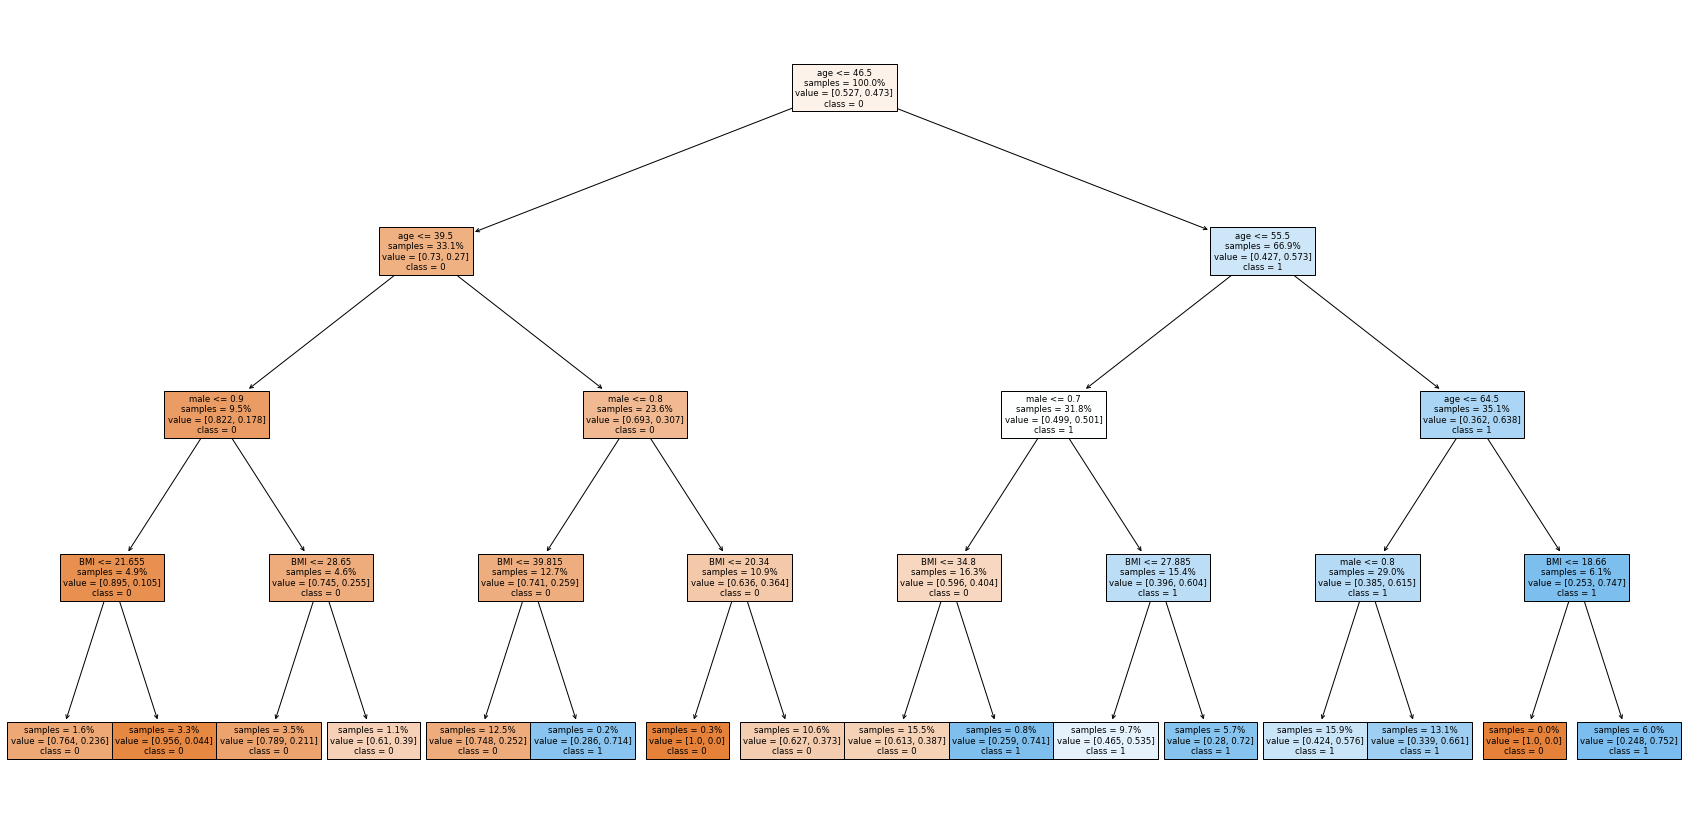

In [26]:
t3 = tree.DecisionTreeClassifier(
    max_depth=4,
    criterion='entropy'
)
tree_fit = t3.fit(
    df_balanced_imputed[features].values,
    df_balanced_imputed['TenYearCHD']
)
tp = tree.plot_tree(
    tree_fit,
    feature_names=features,
    class_names=['0','1'],
    filled=True,
    impurity=False,
    proportion=True
)

In [27]:
scores = cross_val_score(t3, df_balanced_imputed[features].values, df_balanced_imputed['TenYearCHD'])
print(scores.mean(), '±', scores.std())

0.6521876141318225 ± 0.020448235504765027


<div dir=rtl>
    מילה לסיכום: יש הרבה שיטות למילוי ערכים חסרים ובין היתר חלקן ממומשות בפנדס. עבור מידע סדרתי בו יש משמעות לסדר בין הרשומות ניתן למלא ערכים חסרים על ידי רשומות סמוכות. נראה לכך דוגמה פשוטה:
</div>

In [28]:
babys_height = pd.DataFrame(
    [47,59,64,68,74,81,88,96,102,108,113,119,123,124],
    columns=['Height [cm]'],
    index=['Birth','3 mo','6 mo','9 mo']+[f'{y} yr' for y in range(1,11)]
)


babys_height

,Height [cm]
Birth,47
3 mo,59
6 mo,64
9 mo,68
1 yr,74
2 yr,81
3 yr,88
4 yr,96
5 yr,102
6 yr,108


<div dir=rtl>
    נמחק דוגמאות:
</div>

In [29]:
babys_height_deleted = babys_height.copy()
babys_height_deleted.iloc[2, :] = np.nan
babys_height_deleted.iloc[8:11, :] = np.nan
babys_height_deleted

,Height [cm]
Birth,47.0
3 mo,59.0
6 mo,NaN
9 mo,68.0
1 yr,74.0
2 yr,81.0
3 yr,88.0
4 yr,96.0
5 yr,NaN
6 yr,NaN


<div dir=rtl>
    כעת נחזיר את הדוגמאות על ידי שיטות שונות. ראשית - מילוי מהערך הקיים הקודם קדימה:
</div>

In [30]:
babys_height_ffill = babys_height_deleted.fillna(method='ffill')
babys_height_ffill

,Height [cm]
Birth,47.0
3 mo,59.0
6 mo,59.0
9 mo,68.0
1 yr,74.0
2 yr,81.0
3 yr,88.0
4 yr,96.0
5 yr,96.0
6 yr,96.0


<AxesSubplot:>

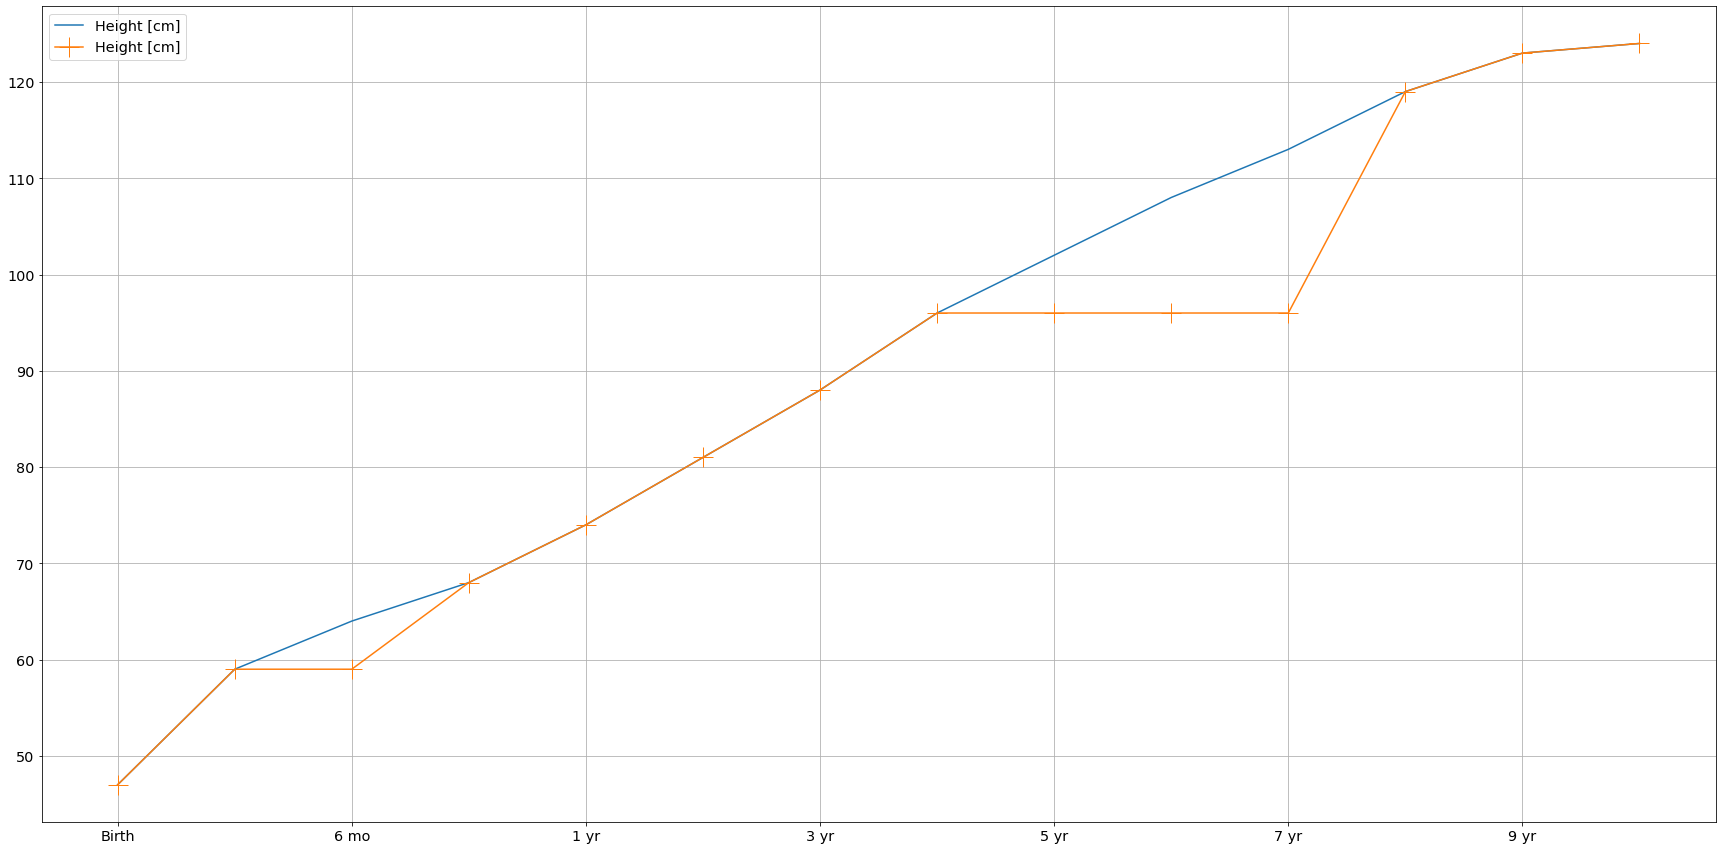

In [31]:
fix, ax = plt.subplots()

babys_height.plot(ax=ax)
babys_height_ffill.plot(ax=ax,marker='+', markersize=20)

<div dir=rtl>
    שנית - מילוי הערך החסר עם הערך הקיים הבא אחריו:
</div>

In [32]:
babys_height_bfill = babys_height_deleted.fillna(method='bfill')
babys_height_bfill

,Height [cm]
Birth,47.0
3 mo,59.0
6 mo,68.0
9 mo,68.0
1 yr,74.0
2 yr,81.0
3 yr,88.0
4 yr,96.0
5 yr,119.0
6 yr,119.0


<AxesSubplot:>

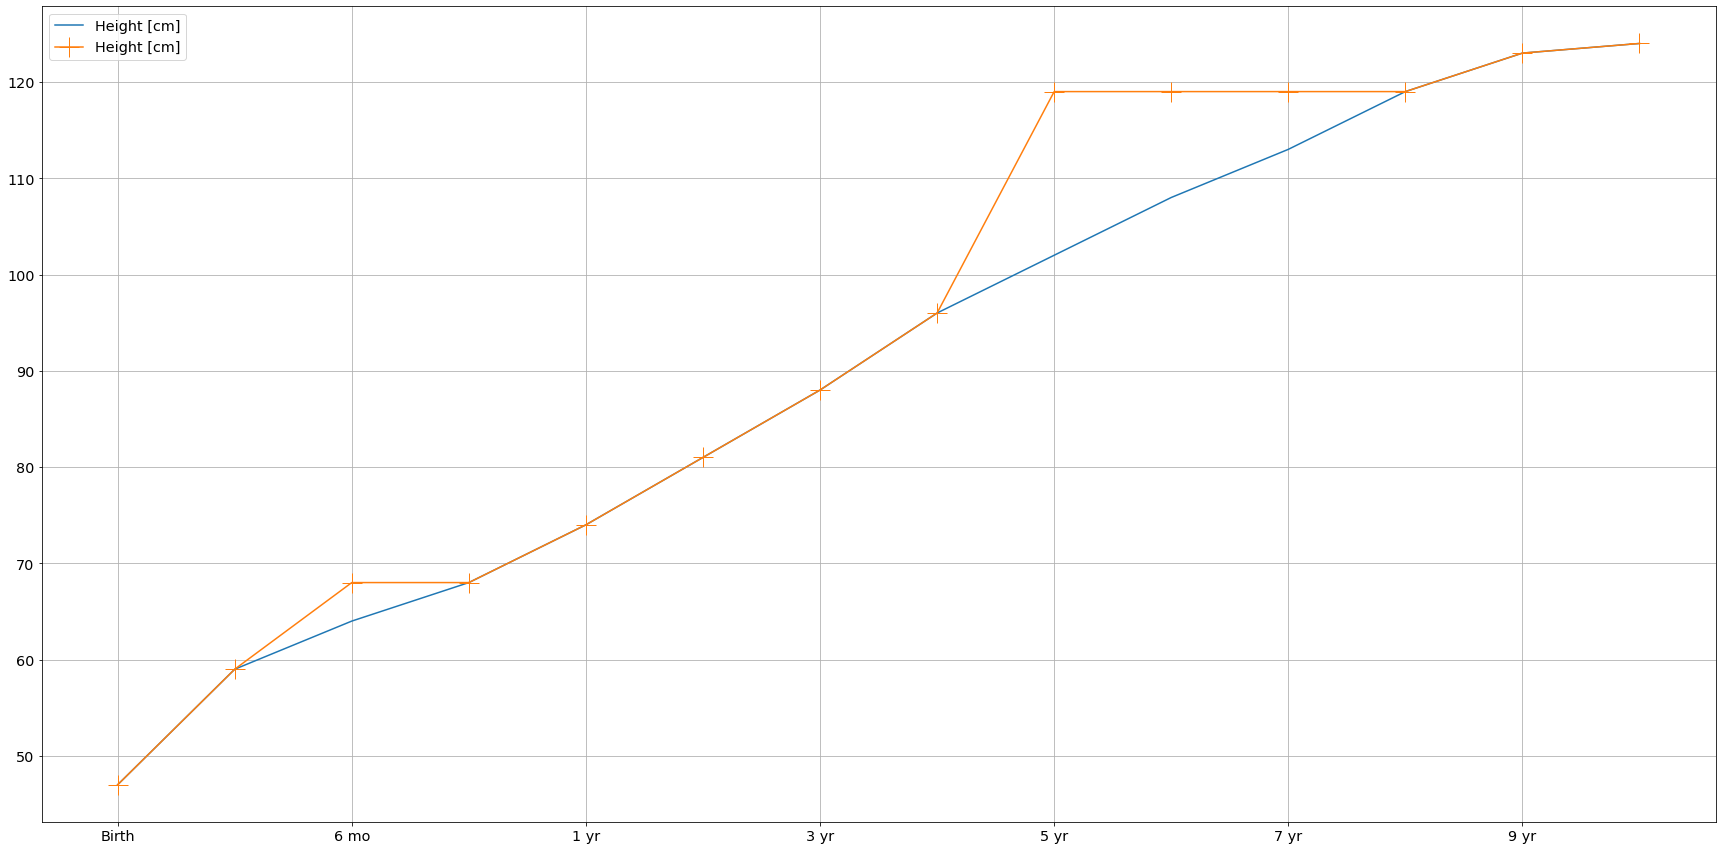

In [33]:
fix, ax = plt.subplots()

babys_height.plot(ax=ax)
babys_height_bfill.plot(ax=ax,marker='+', markersize=20)

<div dir=rtl>
    השיטות עובדות ובמצבים מסומים גם יספיקו עבורינו, אבל נשים לב שהן מייצרות חוסר רציפות שעלול להיות חזק. נראה לבסוף השלמת ערכים חסרים על ידי אינטרפולציה:
</div>

In [34]:
babys_height_interp = babys_height_deleted.interpolate()
babys_height_interp

,Height [cm]
Birth,47.00
3 mo,59.00
6 mo,63.50
9 mo,68.00
1 yr,74.00
2 yr,81.00
3 yr,88.00
4 yr,96.00
5 yr,101.75
6 yr,107.50


<AxesSubplot:>

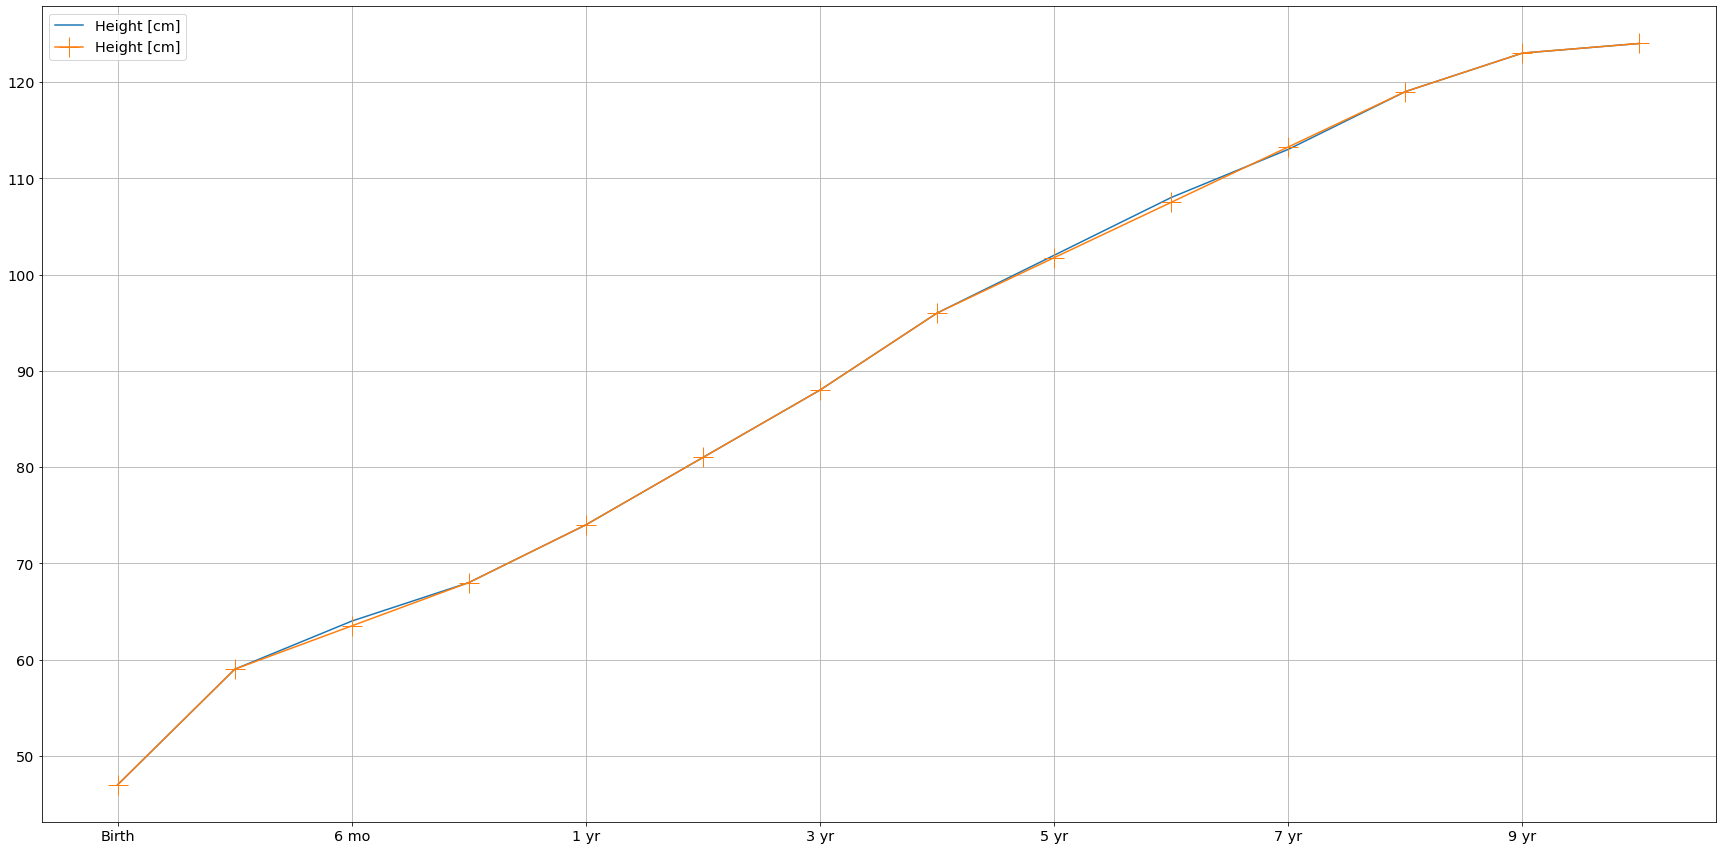

In [35]:
fix, ax = plt.subplots()

babys_height.plot(ax=ax)
babys_height_interp.plot(ax=ax, marker='+', markersize=20)